In [28]:
import pandas as pd

In [29]:
data = pd.read_csv('sales_data.csv')

In [30]:
data['Date'] = pd.to_datetime(data['Date'])

In [31]:
train_data = data[data['Date'] <= "2023-12-31"]
train_data

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72995,2023-12-31,S005,P0016,Toys,North,796,21,0,26.84,5,Cloudy,0,24.20,Winter,1,25
72996,2023-12-31,S005,P0017,Toys,North,104,15,0,26.01,10,Cloudy,0,24.41,Winter,1,14
72997,2023-12-31,S005,P0018,Clothing,North,207,206,187,27.74,5,Cloudy,0,30.23,Winter,1,197
72998,2023-12-31,S005,P0019,Furniture,North,63,40,0,114.49,10,Cloudy,0,98.11,Winter,1,37


In [32]:
train_data = train_data.groupby('Date')['Demand'].sum().reset_index()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    730 non-null    datetime64[ns]
 1   Demand  730 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


In [34]:
train_data

,Date,Demand
0,2022-01-01,10060
1,2022-01-02,10814
2,2022-01-03,11317
3,2022-01-04,11469
4,2022-01-05,11724
...,...,...
725,2023-12-27,7180
726,2023-12-28,7006
727,2023-12-29,6941
728,2023-12-30,6223


In [36]:
train_data['SMA'] = train_data['Demand'].rolling(7).mean()
print(train_data.head(10))

        Date  Demand           SMA
0 2022-01-01   10060           NaN
1 2022-01-02   10814           NaN
2 2022-01-03   11317           NaN
3 2022-01-04   11469           NaN
4 2022-01-05   11724           NaN
5 2022-01-06   10938           NaN
6 2022-01-07   11584  11129.428571
7 2022-01-08   12060  11415.142857
8 2022-01-09   11427  11502.714286
9 2022-01-10   11523  11532.142857


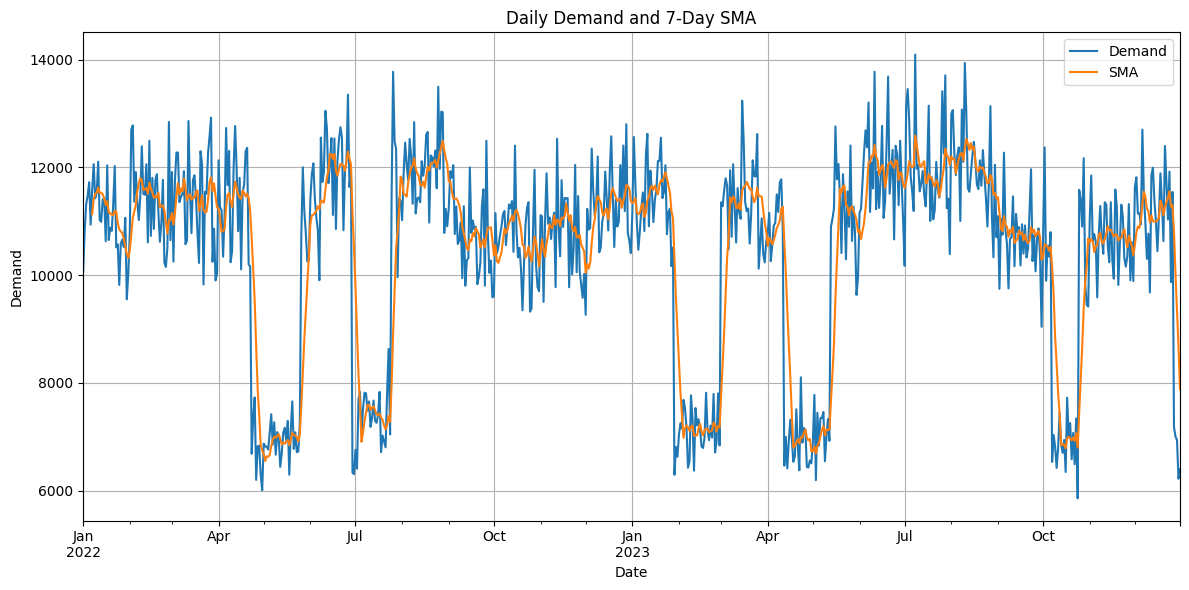

In [38]:
import matplotlib.pyplot as plt

# 使用 Pandas 的 plot 方法绘制 Demand 和 SMA 曲线
ax = train_data.plot(
    x='Date',
    y=['Demand', 'SMA'],  # 你也可以改为 'SMA' 如果你用的是这个列名
    figsize=(12, 6),
    title='Daily Demand and 7-Day SMA',
    grid=True
)

# 添加坐标轴标签
ax.set_xlabel("Date")
ax.set_ylabel("Demand")

plt.tight_layout()
plt.show()